In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
input1 = cv2.imread("/content/drive/MyDrive/Projects/ImageRegistration/Normalized-Cross Correlation/asset/colon1.jpeg")

In [3]:
from scipy import ndimage

input2 = ndimage.rotate(input1,45,reshape=False)

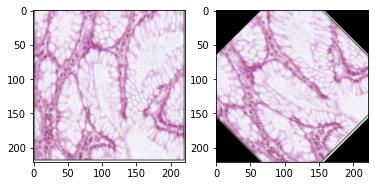

In [4]:
lt = [input1, input2]

for i in range(2):
  plt.subplot(1,2,i+1)
  plt.imshow(lt[i])

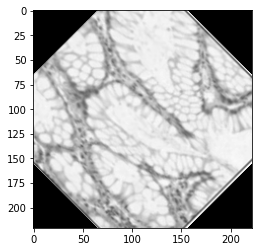

In [5]:
#Converting to Grayscale
input1_gray = cv2.cvtColor(input1,cv2.COLOR_BGR2GRAY)
input2_gray = cv2.cvtColor(input2,cv2.COLOR_BGR2GRAY)
# from scipy import ndimage
# input2 = ndimage.rotate(input1_gray,-90,reshape=False)
plt.imshow(input2_gray,cmap='gray')

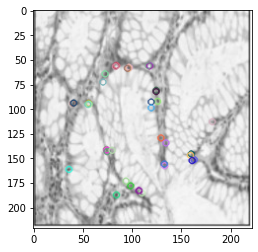

In [6]:
orb = cv2.ORB_create(50)

keys1,des1 = orb.detectAndCompute(input1_gray,None)
img2 = cv2.drawKeypoints(input1_gray,keys1,None,flags=None)#image to be registered
plt.imshow(img2)

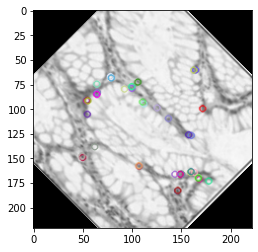

In [7]:
keys2,des2 = orb.detectAndCompute(input2,None)
img3= cv2.drawKeypoints(input2_gray,keys2,None,flags=None)#reference image
plt.imshow(img3)

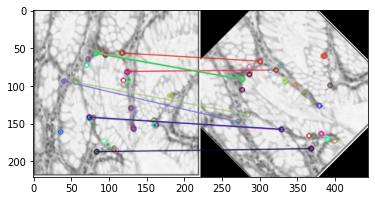

In [8]:
matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)

matches = matcher.match(des1,des2,None)

matches = sorted(matches,key = lambda x:x.distance)

img_match = cv2.drawMatches(img2,keys1,img3,keys2,matches[:10],None)

plt.imshow(img_match)

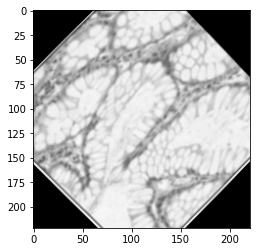

In [14]:
pt1 = np.zeros((len(matches),2),dtype=np.float32)
pt2 = np.zeros((len(matches),2),dtype=np.float32)

for i, match in enumerate(matches):
  pt1[i, :] = keys1[match.queryIdx].pt
  pt2[i, :] = keys2[match.trainIdx].pt

h , mask = cv2.findHomography(pt2,pt1,cv2.RANSAC)

height, width = input2_gray.shape 

imgReg = cv2.warpPerspective(input1_gray, h, (height,width)) 

imgReg = cv2.cvtColor(imgReg,cv2.COLOR_GRAY2BGR)
plt.imshow(imgReg)